In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


creating dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/completeData.csv').astype({'valence_tags': np.float32, 'arousal_tags':np.float32, 'dominance_tags':np.float32})

In [ ]:
from ast import literal_eval
for x in range(len(df['seeds'])):
  df['seeds'][x] = literal_eval(df['seeds'][x])

finding number of unique seeds

In [ ]:
uniqueSeeds = []
for y in df['seeds']:
  for x in y:
    if x not in uniqueSeeds:
      uniqueSeeds.append(x)
uniqueSeeds.sort()
print(len(uniqueSeeds))

272


dropping unnecessary columns

In [ ]:
df2 = df.drop(columns=['lastfm_url', 'track', 'artist','mbid','spotify_id','genre','type','id','uri','track_href','analysis_url'])
df2 = df2.astype({'valence_tags': np.float64, 'arousal_tags':np.float64, 'dominance_tags':np.float64, 'danceability':np.float64, 'energy':np.float64, 'speechiness':np.float64, 'acousticness':np.float64, 'instrumentalness':np.float64, 'liveness':np.float64})

creating mood variable + replace seeds w/mood column in dataframe

In [ ]:
mood = 'calm'

IF THE MOOD IS PRESENT IN THE SONG, THEN 1.
IF THE SONG DOES NOT ELICIT THE MOOD, THEN 0.

In [ ]:
moods = []
for i in range(len(df2)):
  if(mood in df2['seeds'][i]):
    moods.append(1)
  else:
    moods.append(0)
df2['mood'] = moods
df2 = df2.drop(columns=['seeds'])

separate data into X and y - X is a dataframe w equal number of songs w/the mood and songs w/out the mood, y = the mood columns (0s and 1s)

In [ ]:
sampleNum=(df2['mood'].value_counts()[1])
X = pd.concat([df2[df2.mood == 0].sample(sampleNum), df2[df2.mood == 1].sample(sampleNum)])
y = X['mood']
X = X.drop(columns=['mood','Unnamed: 0','number_of_emotion_tags', 'valence_tags', 'arousal_tags', 'dominance_tags'])

creating x/y train/test data

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

creating logistic model/fit

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

logistic regression accuracy/precision:

In [ ]:
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score))

Logistic Regression Model Accuracy: 71.82%


In [ ]:
from sklearn.metrics import precision_score
score2 = precision_score(y_test, predictions)
print('Logistic Regression Model Precision: {:.2%}'.format(score2))

# KNN

create KNN classifier fit to Xtrain, YTrain

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

checking precision and accuracy, but ultimately precision will be compared

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

precisions = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 300):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    precisions.append(precision_score(y_test, pred_i))

Text(0, 0.5, 'Precision Score')

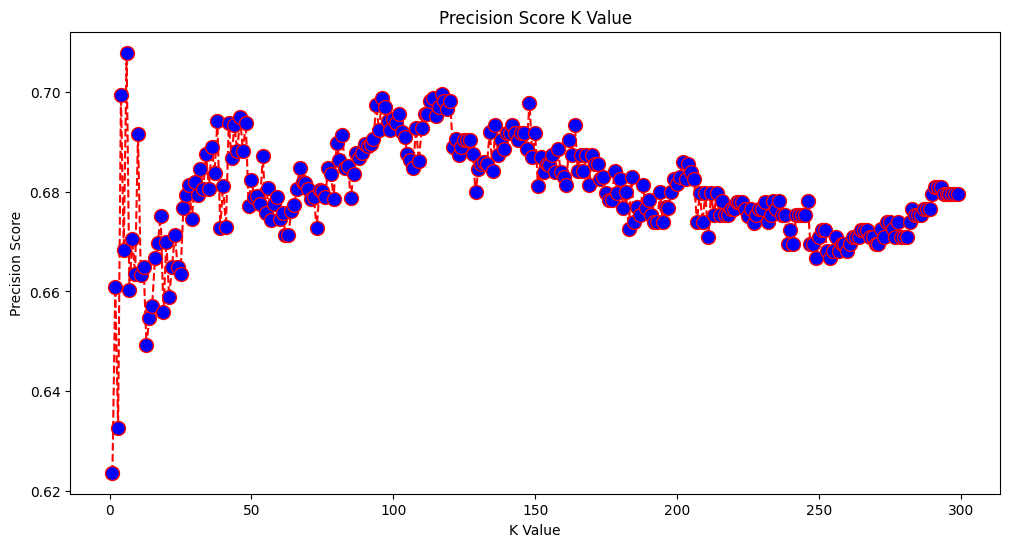

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 300), precisions, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Precision Score K Value')
plt.xlabel('K Value')
plt.ylabel('Precision Score')

Text(0, 0.5, 'Accuracy Score')

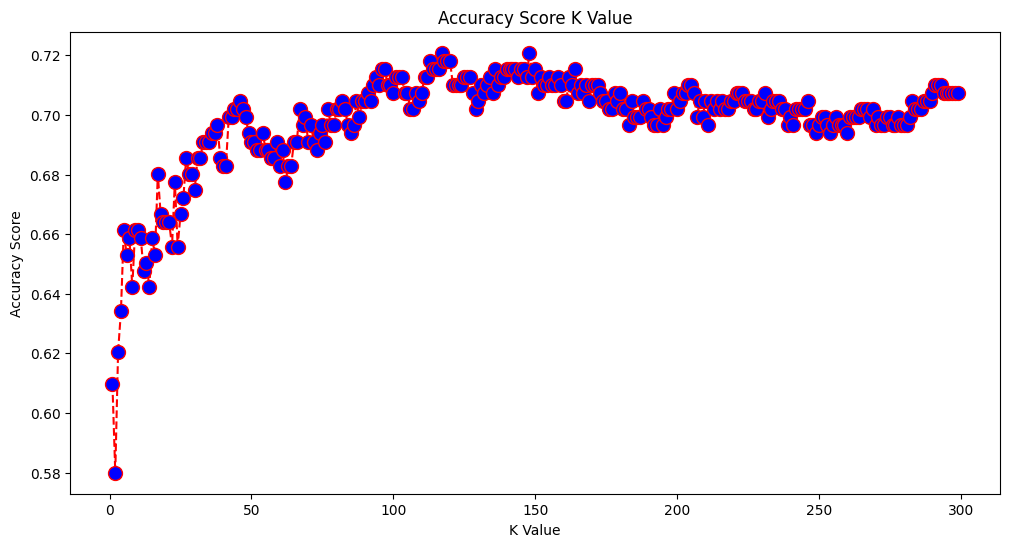

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

accuracies = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 300):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes
    accuracies.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 300), accuracies, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

In [ ]:
maxAccuracy = 0
maxInd2 = 0
for x in range(len(accuracies)):
  if(accuracies[x]>maxAccuracy):
    maxAccuracy = accuracies[x]
    maxInd2 = x+1
print("max accuracies", maxAccuracy, maxInd2)

maxPrecision = 0
maxInd = 0
for x in range(len(precisions)):
  if(precisions[x]>maxPrecision):
    maxPrecision = precisions[x]
    maxInd = x+1
print("max precisions", maxPrecision, maxInd)
print(accuracies[maxInd])

max accuracies 0.7208672086720868 117
max precisions 0.7077922077922078 6
0.6585365853658537


create a classifier for the "k" that had the best precision

In [ ]:
from sklearn.metrics import classification_report

classifierBest = KNeighborsClassifier(n_neighbors=maxInd)
classifierBest.fit(X_train, y_train)
y_predBest = classifierBest.predict(X_test)
print(classification_report(y_test, y_predBest))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67       177
           1       0.71      0.57      0.63       192

    accuracy                           0.65       369
   macro avg       0.66      0.66      0.65       369
weighted avg       0.66      0.65      0.65       369



accuracies and precision:

In [ ]:
print(confusion_matrix(y_test, y_predBest))
print("accuracy: ", 100*accuracy_score(y_test,y_predBest))
print("precision: ", 100*precision_score(y_test,y_predBest))

[[132  45]
 [ 83 109]]
accuracy:  65.31165311653116
precision:  70.77922077922078


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['0 \n(mood not present)','1 \n(mood present)']
cm = pd.DataFrame(confusion_matrix(y_test, y_predBest),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_predBest))

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(classifierBest, X_test, y_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,classifierBest.predict_proba(X_test)[:, 1])

**BEFORE SVN: REVIEW WHY WE DID PRECISION OVER ACCURACY; THE GRAPHS LOOK THE SAME??**
precision - just true positives; accuracy - true positives and false negatives

# SVM:
https://www.geeksforgeeks.org/support-vector-machine-algorithm/
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=V0EuZlh-bVRT

new x/y test/train data

creates a svc model and fits it to the new x/y train data

In [ ]:
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train2, y_train2)

prediction = svc_model .predict(X_test2)
# check the accuracy on the training set
print(svc_model.score(X_train2, y_train2))
print(svc_model.score(X_test2, y_test2))

In [ ]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train2, y_train2)

prediction = svc_model .predict(X_test2)
# check the accuracy on the training set
print(svc_model.score(X_train2, y_train2))
print(svc_model.score(X_test2, y_test2))

tuning hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001,0.01,0.1,1,5,10],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc_model, param_grid, scoring="precision")

grid.fit(X_train2, y_train2)
print(grid.best_params_)

In [ ]:
svc_model = grid.best_estimator_
svc_model.fit(X_train2, y_train2)

prediction = svc_model.predict(X_test2)
# check the accuracy on the training set
print(svc_model.score(X_train2, y_train2))
print(svc_model.score(X_test2, y_test2))

In [ ]:
classes_names = ['0 \n(mood not present)','1 \n(mood present)']

cm = pd.DataFrame(confusion_matrix(y_test2, prediction),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test2, prediction))

precision and accuracy:

In [ ]:
print(precision_score(y_test2,prediction))
print(accuracy_score(y_test2,prediction))

# Naive Bayes (https://www.geeksforgeeks.org/naive-bayes-classifiers/)

training gaussian naive bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train3, y_train3)

# making predictions on the testing set
y_pred3 = gnb.predict(X_test3)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test3, y_pred3)*100)

cm = pd.DataFrame(confusion_matrix(y_test3, y_pred3),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

In [ ]:
print("Gaussian Naive Bayes model precision(in %):", precision_score(y_test3, y_pred3)*100)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train3, y_train3)

# making predictions on the testing set
y_pred4 = bnb.predict(X_test3)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Bernoulli Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test3, y_pred4)*100)


cm = pd.DataFrame(confusion_matrix(y_test3, y_pred4),
                  columns=classes_names, index = classes_names)

# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

In [ ]:
print("Bernoulli Naive Bayes model precision(in %):", precision_score(y_test3, y_pred4)*100)